## Storm Events
Exploratory data analysis of storm events from 2010 to 2019. The datasets are from Storm Events Database of National Centers for Environmental Information (NCEI).

#### Get data from Storm Events Database of NCEI

!wget https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2010_c20191116.csv.gz
!mv StormEvents_details-ftp_v1.0_d2010_c20191116.csv.gz StormEvents_2010.csv.gz

!wget https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2011_c20180718.csv.gz
!mv StormEvents_details-ftp_v1.0_d2011_c20180718.csv.gz StormEvents_2011.csv.gz

!wget https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2012_c20200317.csv.gz
!mv StormEvents_details-ftp_v1.0_d2012_c20200317.csv.gz StormEvents_2012.csv.gz

!wget https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2013_c20170519.csv.gz
!mv StormEvents_details-ftp_v1.0_d2013_c20170519.csv.gz StormEvents_2013.csv.gz

!wget https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2014_c20191116.csv.gz
!mv StormEvents_details-ftp_v1.0_d2014_c20191116.csv.gz StormEvents_2014.csv.gz

!wget https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2015_c20191116.csv.gz
!mv StormEvents_details-ftp_v1.0_d2015_c20191116.csv.gz StormEvents_2015.csv.gz
    
!wget https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2016_c20190817.csv.gz    
!mv StormEvents_details-ftp_v1.0_d2016_c20190817.csv.gz StormEvents_2016.csv.gz 

!wget https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2017_c20200121.csv.gz
!mv StormEvents_details-ftp_v1.0_d2017_c20200121.csv.gz StormEvents_2017.csv.gz  

!wget https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2018_c20200317.csv.gz
!mv StormEvents_details-ftp_v1.0_d2018_c20200317.csv.gz StormEvents_2018.csv.gz

!wget https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2019_c20200317.csv.gz
!mv StormEvents_details-ftp_v1.0_d2019_c20200317.csv.gz StormEvents_2019.csv.gz       


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Initial data exploration

In [2]:
# check 2010 storm events dataset
df_2010 = pd.read_csv('StormEvents_2010.csv.gz', compression = 'gzip')

In [3]:
df_2010.shape

(62804, 51)

In [4]:
# check the fields
df_2010.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

In [5]:
#  select columns of interest from the yearly Storm Events datasets

selected_columns = ['EVENT_ID','STATE', 'YEAR', 'MONTH_NAME',
                    'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS',
                    'WFO','INJURIES_DIRECT', 'INJURIES_INDIRECT', 
                    'DEATHS_DIRECT','DEATHS_INDIRECT', 
                    'DAMAGE_PROPERTY', 'SOURCE',
                    'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE',
                    'TOR_F_SCALE','TOR_LENGTH', 'TOR_WIDTH', 
                    'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
                    'TOR_OTHER_CZ_FIPS',
                    'BEGIN_RANGE', 'END_RANGE','BEGIN_AZIMUTH',
                    'END_AZIMUTH','BEGIN_LAT',
                    'BEGIN_LON', 'END_LAT', 'END_LON']

In [6]:
# read and concatenate yearly Storm Events datasets into a single data frame

df = pd.read_csv('StormEvents_2010.csv.gz', compression = 'gzip')[selected_columns]

for i in range(1,10):
    df_temp = pd.read_csv('StormEvents_' + str(2010 + i) + '.csv.gz', compression = 'gzip')
    df = pd.concat([df, df_temp[selected_columns]])
   

In [7]:
df.shape

(626677, 31)

In [8]:
df.head()

,EVENT_ID,STATE,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,WFO,INJURIES_DIRECT,INJURIES_INDIRECT,...,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_AZIMUTH,END_AZIMUTH,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
0,254780,NEW HAMPSHIRE,2010,July,Heat,Z,12,BOX,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,211550,NEW HAMPSHIRE,2010,January,Heavy Snow,Z,12,BOX,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,260014,NEW HAMPSHIRE,2010,October,Strong Wind,Z,12,BOX,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,254779,NEW HAMPSHIRE,2010,July,Heat,Z,12,BOX,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,273769,NEW HAMPSHIRE,2010,December,Winter Storm,Z,12,BOX,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df['EVENT_TYPE'].nunique()

56

In [10]:
# number of distinct event types
print("There are {} storm event types.".format(df['EVENT_TYPE'].nunique()))

There are 56 storm event types.


## Event type
#### Which storm events occured most frequently?

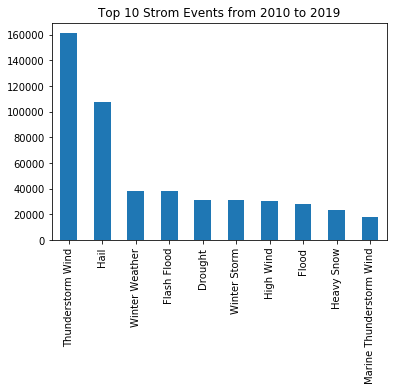

In [11]:
df['EVENT_TYPE'].value_counts()[0:10]\
.plot(kind = 'bar', title ='Top 10 Strom Events from 2010 to 2019')

In [12]:
df['EVENT_TYPE'].value_counts()[:10]

Thunderstorm Wind           161282
Hail                        107302
Winter Weather               38296
Flash Flood                  38226
Drought                      31440
Winter Storm                 31081
High Wind                    30783
Flood                        27971
Heavy Snow                   23325
Marine Thunderstorm Wind     18380
Name: EVENT_TYPE, dtype: int64

# Fatalities

In [13]:
def fatality(col_name):
    """ Returns direct, indirect, and total fatalities grouped by col_name. """
    
    df_fatality = df.groupby(col_name).sum()[['DEATHS_DIRECT','DEATHS_INDIRECT']]
    df_fatality['DEATHS_TOTAL'] = df_fatality['DEATHS_DIRECT'] \
                                 + df_fatality['DEATHS_INDIRECT']
    
    return df_fatality    

## Direct fatalities by event type

#### Which storm events caused the most direct fatalities?

In [14]:
df_fatalityD_event = fatality('EVENT_TYPE').sort_values('DEATHS_DIRECT', ascending = False)

In [15]:
df_fatalityD_event[:10]

,DEATHS_DIRECT,DEATHS_INDIRECT,DEATHS_TOTAL
EVENT_TYPE,,,
Tornado,908,26,934
Flash Flood,691,41,732
Excessive Heat,635,129,764
Heat,552,194,746
Rip Current,489,7,496
Thunderstorm Wind,320,59,379
Flood,296,38,334
Lightning,260,30,290
Cold/Wind Chill,260,32,292


In [16]:
# total fatalities
df_fatalityD_event.sum()

DEATHS_DIRECT      5568
DEATHS_INDIRECT    1983
DEATHS_TOTAL       7551
dtype: int64

In [17]:
print("The total direct fatality is {}.".format(df_fatalityD_event.sum()[0]))

The total direct fatality is 5568.


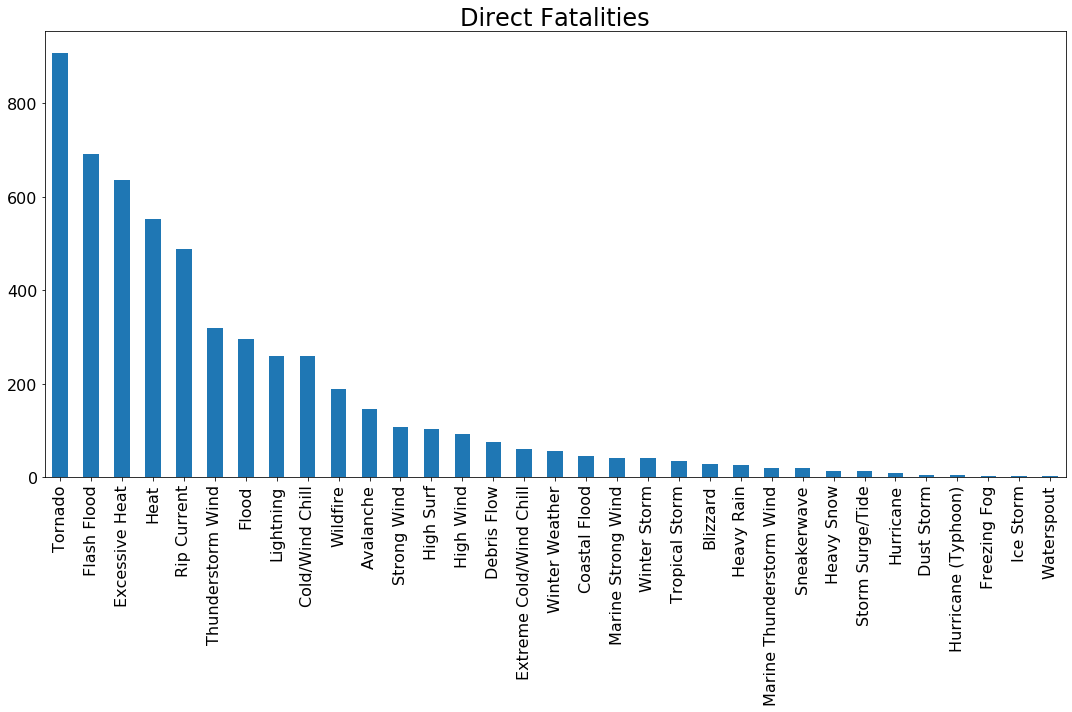

In [18]:
# create and save direct_fatalities bar plot
fig, axs = plt.subplots(figsize=(15,10))    
df_fatalityD_event['DEATHS_DIRECT'][:33].plot(kind = 'bar')
axs.set_title('Direct Fatalities', fontsize=24)
axs.set_xlabel('',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout() # to make sure that the ticks are not cut off
fig.savefig('direct_fatalities.png')

In [19]:
top5_events = ['Tornado', 'Flash Flood', 'Excessive Heat', 'Heat', 'Rip Current']

## Top 5 direct fatalities by year

#### What are the yearly direct fatalities caused by the top five storm event types?

In [20]:
df_yearly_deaths = df[df['EVENT_TYPE'] == 'Tornado'].groupby('YEAR').sum()['DEATHS_DIRECT']

for event in top5_events[1:]:
    df_yearly_temp = df[df['EVENT_TYPE'] == event].groupby('YEAR').sum()['DEATHS_DIRECT']
    df_yearly_deaths = pd.concat([df_yearly_deaths, df_yearly_temp], axis=1)

df_yearly_deaths.columns = top5_events # rename the columns

In [21]:
df_yearly_deaths

,Tornado,Flash Flood,Excessive Heat,Heat,Rip Current
YEAR,,,,,
2010,45,67,74,64,47
2011,553,69,127,79,30
2012,69,18,91,65,38
2013,55,60,50,42,53
2014,47,31,5,15,47
2015,36,142,12,33,46
2016,18,86,50,44,49
2017,35,123,54,53,63
2018,10,54,156,125,59


In [22]:
df_yearly_deaths.sum(axis=1)

YEAR
2010    297
2011    858
2012    281
2013    260
2014    145
2015    269
2016    247
2017    328
2018    404
2019    186
dtype: int64

In [23]:
df_yearly_deaths.sum(axis=0)

Tornado           908
Flash Flood       691
Excessive Heat    635
Heat              552
Rip Current       489
dtype: int64

In [24]:
df_yearly_deaths.sum().sum()

3275

In [25]:
print("The total direct fatality by the top 5 storm events is {}." \
      .format(df_yearly_deaths.sum().sum()))

The total direct fatality by the top 5 storm events is 3275.


In [26]:
3275/5568

0.5881824712643678

In [27]:
print("58.8% of direct fatality was caused by the top 5 strom events.")

58.8% of direct fatality was caused by the top 5 strom events.


In [28]:
# statistics for the yearly direct fatalities by the top five storm types
df_yearly_deaths.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tornado,10.0,90.8,163.274683,10.0,35.25,42.5,53.00,553.0
Flash Flood,10.0,69.1,38.977059,18.0,44.25,63.5,81.75,142.0
Excessive Heat,10.0,63.5,49.710830,5.0,24.50,52.0,86.75,156.0
Heat,10.0,55.2,30.846574,15.0,35.25,48.5,64.75,125.0
Rip Current,10.0,48.9,9.859570,30.0,46.25,48.0,56.00,63.0


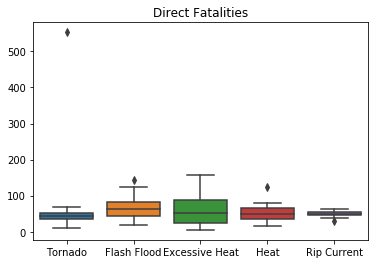

In [29]:
# create and save the yearly direct fatalities by the top five storm types box plot
fig, axs = plt.subplots()
fig = sns.boxplot(data = df_yearly_deaths)
axs.set_title('Direct Fatalities')
fig.figure.savefig('direct_boxplt.png')

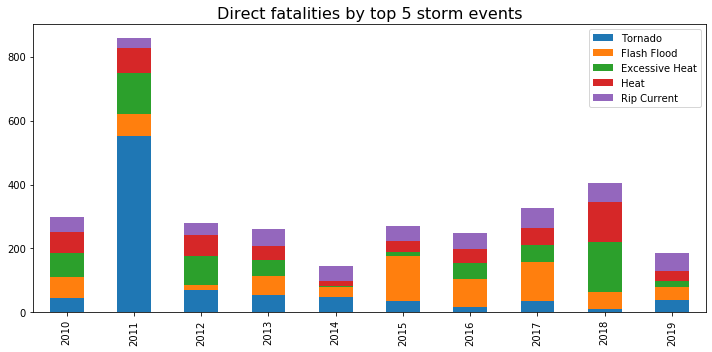

In [30]:
# create and save the yearly direct fatalities by the top five storm types stacked bar plot
fig, axs = plt.subplots(figsize=(10,5))   
df_yearly_deaths.plot(kind = 'bar',stacked = True,ax=axs)
axs.set_title('Direct fatalities by top 5 storm events', fontsize=16)
axs.set_xlabel('')
#axs.yaxis.grid(True)
plt.tight_layout()
fig.savefig('top5_direct_fatalities.png')

### Total fatalities by event type

#### Which storm event types caused the most total fatalities?

In [31]:
df_fatality_event = fatality('EVENT_TYPE')\
                    .sort_values('DEATHS_TOTAL', ascending = False) # sort by total fatality

In [32]:
df_fatality_event

,DEATHS_DIRECT,DEATHS_INDIRECT,DEATHS_TOTAL
EVENT_TYPE,,,
Tornado,908,26,934
Excessive Heat,635,129,764
Heat,552,194,746
Flash Flood,691,41,732
Winter Weather,56,498,554
Rip Current,489,7,496
Thunderstorm Wind,320,59,379
Flood,296,38,334
Cold/Wind Chill,260,32,292


In [33]:
# fatalities
df_fatality_event.sum()

DEATHS_DIRECT      5568
DEATHS_INDIRECT    1983
DEATHS_TOTAL       7551
dtype: int64

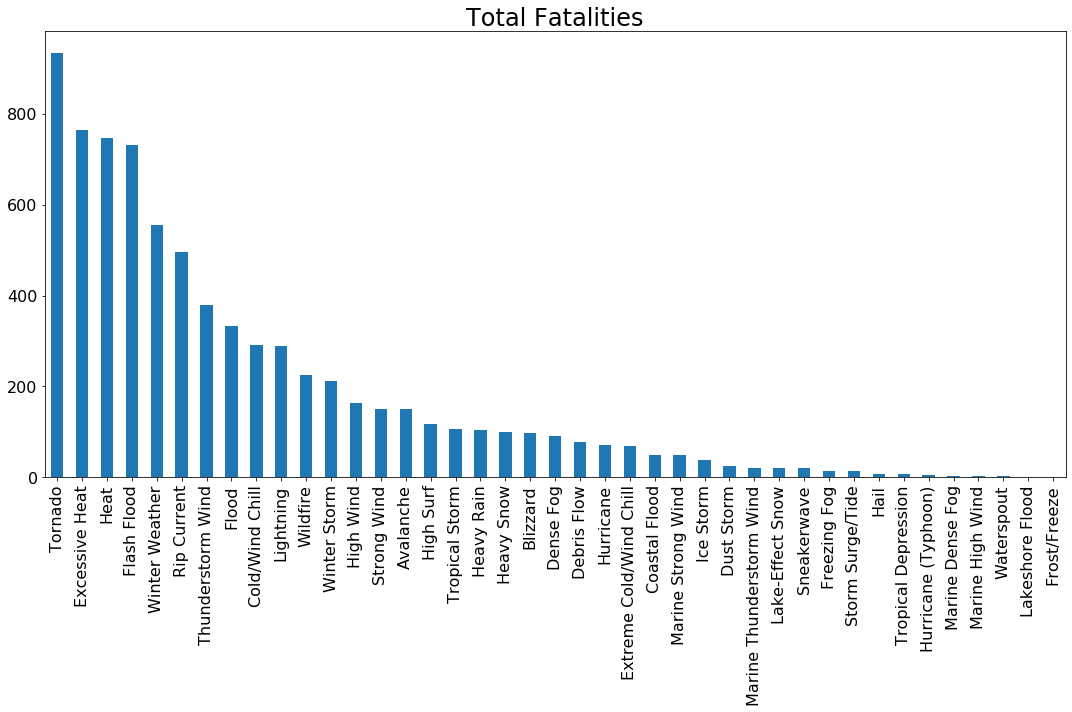

In [34]:
# create and save total_fatalities bar plot
fig, axs = plt.subplots(figsize=(15,10))  
df_fatality_event['DEATHS_TOTAL'][:41].plot(kind = 'bar')
axs.set_title('Total Fatalities', fontsize=24)
axs.set_xlabel('',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
fig.savefig('total_fatalities.png')

In [35]:
df_fatality_event['DEATHS_TOTAL'][:5]

EVENT_TYPE
Tornado           934
Excessive Heat    764
Heat              746
Flash Flood       732
Winter Weather    554
Name: DEATHS_TOTAL, dtype: int64

In [36]:
df_fatality_event['DEATHS_TOTAL'][:5].sum()

3730

In [37]:
3730/7551

0.4939743080386704

### Total fatalities by state

In [38]:
df_fatality_state = fatality('STATE').sort_values('DEATHS_TOTAL', ascending = False)

In [39]:
df_fatality_state.head()

,DEATHS_DIRECT,DEATHS_INDIRECT,DEATHS_TOTAL
STATE,,,
TEXAS,467,178,645
NEVADA,359,173,532
CALIFORNIA,342,92,434
FLORIDA,281,140,421
ALABAMA,359,36,395


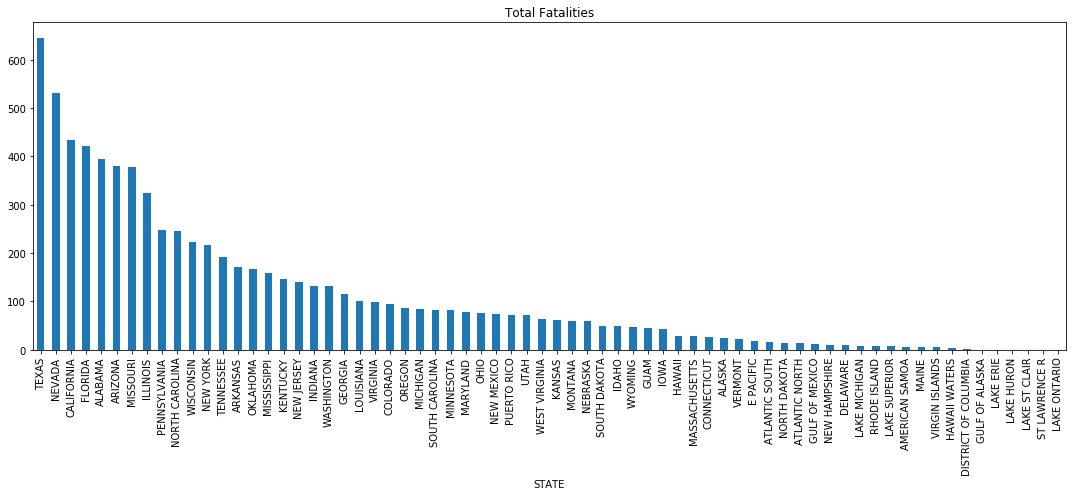

In [40]:
fig, axs = plt.subplots(figsize=(15,7))  
df_fatality_state['DEATHS_TOTAL'].plot(kind = 'bar')
axs.set_title('Total Fatalities')
plt.tight_layout()

### Total fatalities by year

In [41]:
df_fatality_year = fatality('YEAR').sort_values('DEATHS_TOTAL', ascending = False)

In [42]:
df_fatality_year.head()

,DEATHS_DIRECT,DEATHS_INDIRECT,DEATHS_TOTAL
YEAR,,,
2011,1096,240,1336
2018,728,315,1043
2017,491,230,721
2012,537,170,707
2015,536,165,701


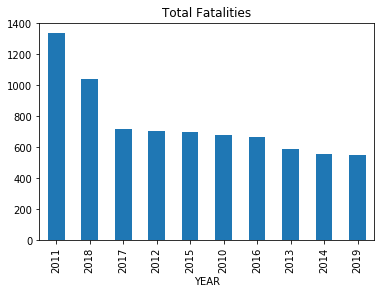

In [43]:
df_fatality_year['DEATHS_TOTAL'] \
.plot(kind = 'bar', title = 'Total Fatalities')

# Property Damage

In [44]:
df_damage = df[['EVENT_ID','STATE','EVENT_TYPE','YEAR','MONTH_NAME','DAMAGE_PROPERTY']]

In [45]:
# check for null values
df_damage.count()

EVENT_ID           626677
STATE              626677
EVENT_TYPE         626677
YEAR               626677
MONTH_NAME         626677
DAMAGE_PROPERTY    513677
dtype: int64

In [46]:
# number of missing values for DAMAGE_PROPERTY
626677-513677

113000

In [47]:
# drop null values
df_damage = df_damage.dropna()

In [48]:
df_damage.shape

(513677, 6)

In [49]:
df_damage.head()

,EVENT_ID,STATE,EVENT_TYPE,YEAR,MONTH_NAME,DAMAGE_PROPERTY
0,254780,NEW HAMPSHIRE,Heat,2010,July,0.00K
1,211550,NEW HAMPSHIRE,Heavy Snow,2010,January,0.00K
2,260014,NEW HAMPSHIRE,Strong Wind,2010,October,50.00K
3,254779,NEW HAMPSHIRE,Heat,2010,July,0.00K
4,273769,NEW HAMPSHIRE,Winter Storm,2010,December,0.00K


In [50]:
# check if any DAMAGE_PROPERTY values are without K, M, or B
df_damage[df_damage['DAMAGE_PROPERTY'].str.contains('K|M|B')== False]

,EVENT_ID,STATE,EVENT_TYPE,YEAR,MONTH_NAME,DAMAGE_PROPERTY
70113,340690,MICHIGAN,Flash Flood,2011,July,0.00


In [51]:
df_damage_1 = df_damage[df_damage['DAMAGE_PROPERTY'].str.contains('K|M|B')== True].copy()

In [52]:
df_damage_1.shape

(513676, 6)

In [53]:
# Create a numeric column for DAMAGE_PROPERTY in million. 
dict_1 ={'K':0.001, 'M':1, 'B':1000}

df_damage_1['DAMAGE_PROPERTY_million'] = df_damage_1['DAMAGE_PROPERTY']\
                                        .transform(lambda x: float(x[:-1]) * dict_1[x[-1]])

## Billion-dollar storm events

In [54]:
df_damage_billion = df_damage_1[df_damage_1['DAMAGE_PROPERTY_million'] >= 1000]
df_damage_billion.sort_values('DAMAGE_PROPERTY_million', ascending = False)

,EVENT_ID,STATE,EVENT_TYPE,YEAR,MONTH_NAME,DAMAGE_PROPERTY,DAMAGE_PROPERTY_million
33321,788675,CALIFORNIA,Wildfire,2018,November,17.00B,17000.0
56447,720861,TEXAS,Flash Flood,2017,August,10.00B,10000.0
55840,720871,TEXAS,Flash Flood,2017,August,10.00B,10000.0
55657,720852,TEXAS,Flash Flood,2017,August,8.00B,8000.0
19923,416942,NEW JERSEY,Coastal Flood,2012,October,7.50B,7500.0
55831,728349,TEXAS,Flash Flood,2017,August,7.00B,7000.0
20182,416946,NEW JERSEY,Coastal Flood,2012,October,5.00B,5000.0
20183,416948,NEW JERSEY,Coastal Flood,2012,October,5.00B,5000.0
37016,719342,TEXAS,Flash Flood,2017,August,3.00B,3000.0
37812,296617,MISSOURI,Tornado,2011,May,2.80B,2800.0


In [55]:
# check if coastal floods have different EVENT_ID's

df_damage_billion_test = df_damage_1[(df_damage_1['DAMAGE_PROPERTY_million'] >= 1000) &
                               (df_damage_1['EVENT_TYPE'] == 'Coastal Flood')]
df_damage_billion_test

,EVENT_ID,STATE,EVENT_TYPE,YEAR,MONTH_NAME,DAMAGE_PROPERTY,DAMAGE_PROPERTY_million
19923,416942,NEW JERSEY,Coastal Flood,2012,October,7.50B,7500.0
19924,416943,NEW JERSEY,Coastal Flood,2012,October,2.50B,2500.0
20182,416946,NEW JERSEY,Coastal Flood,2012,October,5.00B,5000.0
20183,416948,NEW JERSEY,Coastal Flood,2012,October,5.00B,5000.0


In [56]:
print("There are {} storm events that caused 1 billion or more in property damage." \
     .format(df_damage_billion.shape[0]))

There are 36 storm events that caused 1 billion or more in property damage.


In [57]:
df_damage_billion['DAMAGE_PROPERTY_million'].sum()/1000

115.75

In [58]:
print("The total property damage by billion-dollar storm events is $115.75 billion.")

The total property damage by billion-dollar storm events is $115.75 billion.


## Property damage by event type

#### Which storm events caused the most property damage?

In [59]:
df_damage_event = df_damage_1.groupby('EVENT_TYPE')\
                             .sum()['DAMAGE_PROPERTY_million']\
                             .sort_values(ascending = False)

In [60]:
df_damage_event[:10]

EVENT_TYPE
Flash Flood          76724.26032
Wildfire             22282.31664
Flood                21978.05988
Tornado              21627.47430
Coastal Flood        21147.93530
Hail                 16547.88073
Hurricane            12551.62000
Tropical Storm        7499.76565
High Wind             5171.16683
Thunderstorm Wind     2711.85411
Name: DAMAGE_PROPERTY_million, dtype: float64

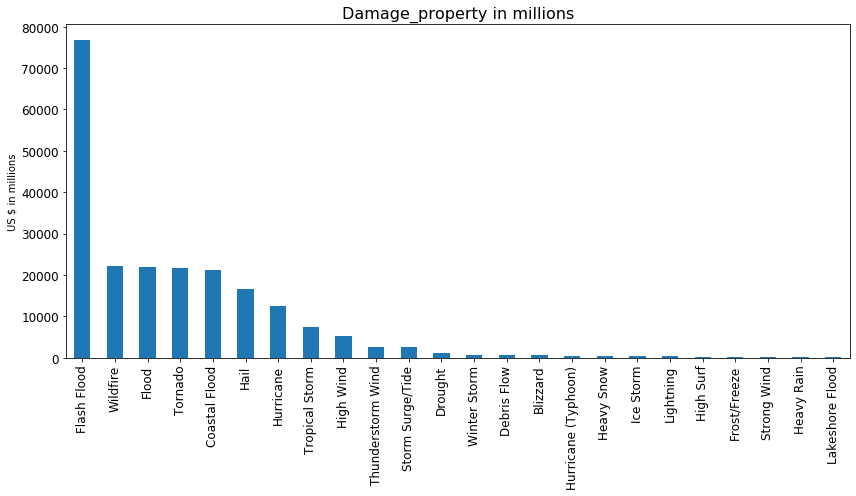

In [61]:
fig, axs = plt.subplots(figsize=(12,7))  
df_damage_event[:24].plot(kind = 'bar', title = 'Damage_property in million $')
axs.set_title('Damage_property in millions', fontsize = 16)
axs.set_xlabel('')
axs.set_ylabel('US $ in millions')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

In [62]:
# top 5 damage events
top5_damage = ['Flash Flood', 'Wildfire', 'Flood', 'Tornado', 'Coastal Flood']

In [63]:
# total property damage in millions
df_damage_event.sum()

217006.75193000212

In [64]:
# property damage by the top 5 events
df_damage_event[:5].sum()

163760.04643999983

In [65]:
163760.04643999983/217006.75193000212

0.7546311116292935

In [66]:
print("75.5% of property damage was caused by top 5 strom events.")

75.5% of property damage was caused by top 5 strom events.


## Top 5 property damage by year

#### What are the yearly property damages caused by the top 5 storm event types?

In [67]:
# yearly distribution of top 5 property damage

df_yearly_damage = df_damage_1[df_damage_1['EVENT_TYPE'] == 'Flash Flood']\
                   .groupby('YEAR')\
                   .sum()['DAMAGE_PROPERTY_million']

for event in top5_damage[1:]:
    df_yearly_temp = df_damage_1[df_damage_1['EVENT_TYPE'] == event]\
                     .groupby('YEAR')\
                     .sum()['DAMAGE_PROPERTY_million']
    df_yearly_damage = pd.concat([df_yearly_damage, df_yearly_temp], axis=1)

df_yearly_damage.columns = top5_damage # rename the columns

In [68]:
df_yearly_damage

,Flash Flood,Wildfire,Flood,Tornado,Coastal Flood
YEAR,,,,,
2010,833.80040,244.88967,3093.91854,1136.92045,7.7450
2011,1356.24670,667.21740,6621.68595,9684.15070,27.2740
2012,379.16150,1460.08730,119.05130,1648.69650,21049.5488
2013,957.03283,355.80930,1215.71020,3642.16775,23.9435
2014,2476.86760,323.81146,148.98499,622.07000,3.3865
2015,1833.83237,22.89700,686.59510,317.88110,14.3935
2016,3645.40207,181.50101,7066.26598,181.17620,0.7235
2017,63118.68526,155.96450,1527.37730,633.77220,6.3105
2018,683.10386,18842.00800,520.45062,670.25390,14.1650


In [69]:
df_yearly_damage.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Flash Flood,10.0,7672.426032,19505.637047,379.1615,864.608507,1398.187215,2316.108793,63118.68526
Wildfire,10.0,2228.231664,5852.806964,22.8970,162.348627,284.350565,589.365375,18842.00800
Flood,10.0,2197.805988,2594.731138,119.0513,561.986740,1096.865050,2702.283230,7066.26598
Tornado,10.0,2162.747430,2890.721148,181.1762,624.995550,903.587175,2729.963250,9684.15070
Coastal Flood,10.0,2114.793530,6653.001202,0.4450,4.117500,10.955000,21.556000,21049.54880


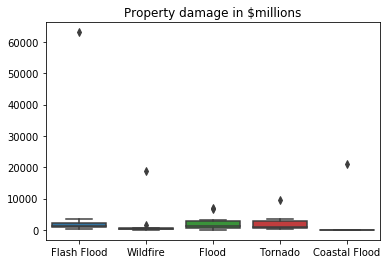

In [70]:
fig, axs = plt.subplots()
fig = sns.boxplot(data = df_yearly_damage).set_title("Property damage in $millions")
fig.figure.savefig('property_boxplt.png')

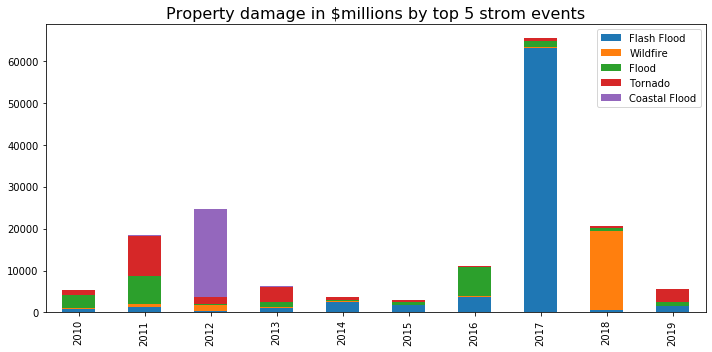

In [71]:
fig, axs = plt.subplots(figsize=(10,5))   
df_yearly_damage.plot(kind = 'bar',
                      stacked = True, 
                      ax = axs)
axs.set_title('Property damage in $millions by top 5 strom events',fontsize=16)
axs.set_xlabel('')
#axs.yaxis.grid(True)
plt.tight_layout()
fig.savefig('top5_damage.png')